### Learn Pandas in 10 minutes

[https://pandas.pydata.org/pandas-docs/stable/10min.html](https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Датасет
Мы будем работать с датасетом задержек авиарейсов https://www.kaggle.com/datasets/usdot/flight-delays. Скачайте файлы из этого датасета.

### Чтение данных

`pd.read_csv` считает таблицу в объект типа датафрейм.
При чтении таблицы возникает некий Warning - про него поговорим чуть позже.

`df.head` покажет пять (по умолчанию) верхних строк таблицы:

In [ ]:
df = pd.read_csv('/content/sample_data/flights.csv')
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Из чего состоит таблица

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)

Индексация строк/столбцов

![](https://i0.wp.com/sparkbyexamples.com/wp-content/uploads/2021/10/pandas-difference-loc-vs-iloc.png?resize=840%2C353&ssl=1)

Размеры таблицы

In [ ]:
len(df), df.shape

(300145, (300145, 31))

Список названий колонок

In [ ]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Базовая информация по колонкам

In [ ]:
print(df.info(null_counts=True))

<ipython-input-26-9f5e2d54215b>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df.info(null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145216 entries, 0 to 145215
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 145216 non-null  int64  
 1   MONTH                145216 non-null  int64  
 2   DAY                  145216 non-null  int64  
 3   DAY_OF_WEEK          145216 non-null  int64  
 4   AIRLINE              145216 non-null  object 
 5   FLIGHT_NUMBER        145216 non-null  int64  
 6   TAIL_NUMBER          144913 non-null  object 
 7   ORIGIN_AIRPORT       145216 non-null  object 
 8   DESTINATION_AIRPORT  145215 non-null  object 
 9   SCHEDULED_DEPARTURE  145215 non-null  float64
 10  DEPARTURE_TIME       141391 non-null  float64
 11  DEPARTURE_DELAY      141391 non-null  float64
 12  TAXI_OUT             141270 non-null  float64
 13  WHEELS_OFF           141270 non-null  float64
 14  SCHEDULED_TIME       145215 non-null  float64
 15  ELAPSED_TIME     

Пришло время вспомнить про warning, который возникал при чтении таблицы. Он связан с тем, что данные в таблицы неоднородны по типу. Как одно из побочных явлений - обратите внимание на колонки, в которых по смыслу стоит время. Они при чтении преобразовались в тип float. В результате запись 0005 превратилась в число 5. Чтобы избежать таких проблем, будем считывать данные как строковые переменные:

In [ ]:
df = pd.read_csv('/content/sample_data/flights.csv', dtype=str)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Определим колонки с пропущенными значениями

In [ ]:
df.isna().any(axis=0)

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME         False
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL       True
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED                True
CANCELLED               True
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

Найдем строки, для которых не указано время отправления или прибытия

In [ ]:
df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
300140    False
300141    False
300142    False
300143    False
300144     True
Length: 300145, dtype: bool

Найдем количество таких строк

In [ ]:
df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1).sum()

5872

и выбросим их

In [ ]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]

Пример подсчета уникальных элементов в столбце

In [ ]:
df['AIRLINE'].value_counts()
df.AIRLINE.value_counts()

WN    62797
DL    40629
EV    31134
OO    29805
AA    27803
UA    24450
US    21088
MQ    17326
B6    13794
AS     8447
NK     5501
F9     4373
HA     4089
VX     3037
Name: AIRLINE, dtype: int64

Плохой пример построения гистограмм по значениям в столбце

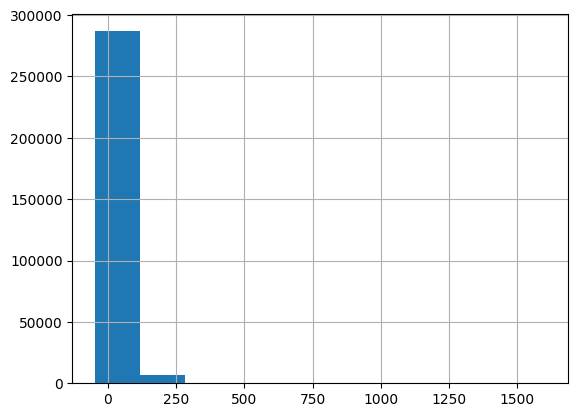

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)
df.DEPARTURE_DELAY.hist()
plt.show()

Более показательный график

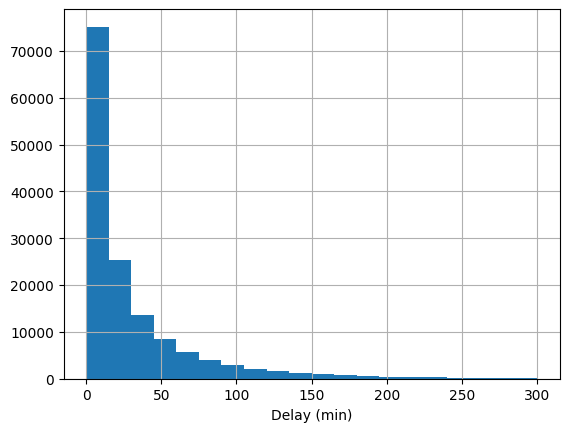

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.DEPARTURE_DELAY.hist(bins=20, range=(0, 300))
plt.xlabel('Delay (min)')
plt.show()

Базовые статистики

In [ ]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].mean()

34.6819680544971

In [ ]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].std()

52.32174636904561

In [ ]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].median()

17.0

Создание колонки с датой, вместо трех отдельных колонок

In [ ]:
pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
300139   2015-01-20
300140   2015-01-20
300141   2015-01-20
300142   2015-01-20
300143   2015-01-20
Length: 294273, dtype: datetime64[ns]

Создание новой колонки в таблице

In [ ]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


Пример использования:

In [ ]:
df.loc[df.DATE <= pd.to_datetime('2015-02-14')]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300139,2015,1,20,2,AA,1576,N3KTAA,SNA,PHX,1625,...,-17,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-20
300140,2015,1,20,2,AA,1591,N3KMAA,DFW,SEA,1625,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-20
300141,2015,1,20,2,AA,2399,N502AA,DFW,IAH,1625,...,-10,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-20
300142,2015,1,20,2,AS,402,N587AS,PDX,SJC,1625,...,-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-20


Удалим ненужные более столбцы

In [ ]:
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,0005,2354,-11.0,21,...,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8.0,12,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,0020,0018,-2.0,16,...,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5.0,15,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,0025,0024,-1.0,11,...,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


Как поменять порядок столбцов?

In [ ]:
cols = list(df.columns)
cols[-1:] + cols[:-1]

['DATE',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

Переместим последний столбец на первое место

In [ ]:
df = df[cols[-1:] + cols[:-2]]
df.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,0005,2354,-11.0,...,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8.0,...,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,0020,0018,-2.0,...,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5.0,...,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,0025,0024,-1.0,...,0320,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN


Посмотрим на столбец ORIGIN_AIRPORT. В нем много непонятных значений

In [ ]:
df.ORIGIN_AIRPORT.unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'DFW', 'MKE', 'IAH',
       'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'PHL', 'SBN', 'EUG', 'IAD',
       'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT', 'SMF', 'AUS', 'MCI',
       'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA', 'SAT', 'CHS', 'SBA',
       'IND', 'CLE', 'GSP', 'BDL', 'RIC', 'BFL', 'OMA', 'RDM', 'FLL',
       'CID', 'TPA', 'SYR', 'ROC', 'TYR', 'LAN', 'GSO', 'EWR', 'PBI',
       'RSW', 'OAK', 'PVD', 'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'TUL',
       'LGA', 'LIT', 'MSY', 'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT',
       'SAV', 'CLT', 'GRB', 'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX',
       'CWA', 'TTN', 'RDU', 'CVG', 'BHM', 'ACY', 'DTW', 'RAP', 'TUS',
       'EAU', 'DLH', 'FSD', 'INL', 'SPI', 'CLD', 'COD', 'CMH', 'PSC',
       'CPR', 'ACV', 'DAL', 'PAH', 'MRY', 'ESC', 'ISN', 'PSP', 'CAE',
       'STL', 'BTV',

Как отделить нормальные значения от ненормальных? Например, по длине строки:

In [ ]:
df.ORIGIN_AIRPORT.apply(len)

0         3
1         3
2         3
3         3
4         3
         ..
300139    3
300140    3
300141    3
300142    3
300143    3
Name: ORIGIN_AIRPORT, Length: 294273, dtype: int64

Фильтруем датасет (комментарий: на практике не нужно доверять признаку длина строки, лучше непосредственно проверять, если ли данная запись в справочнике аэропортов)

In [ ]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]

In [ ]:
df.AIRLINE.unique()

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'F9',
       'WN', 'MQ', 'VX'], dtype=object)

Метод loc позволяет получать срезы датасета. Например, найдем из каких городов летает авиакомпание АА:

In [ ]:
df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].unique()

array(['LAX', 'SFO', 'LAS', 'SEA', 'DEN', 'PHX', 'MCO', 'DFW', 'BOS',
       'IAH', 'SAT', 'JFK', 'AUS', 'EWR', 'MIA', 'SLC', 'BWI', 'MCI',
       'TUL', 'LGA', 'LIT', 'PDX', 'TPA', 'SMF', 'MSY', 'OMA', 'OKC',
       'DCA', 'STL', 'SJU', 'MKE', 'BNA', 'MSP', 'SAN', 'RDU', 'IAD',
       'CLT', 'PHL', 'PBI', 'JAX', 'PIT', 'COS', 'DSM', 'RIC', 'BDL',
       'SNA', 'BHM', 'MEM', 'CLE', 'ATL', 'FAT', 'DAY', 'ORF', 'IND',
       'CMH', 'ELP', 'ONT', 'RNO', 'SJC', 'ABQ', 'PSP', 'RSW', 'FLL',
       'JAC', 'TUS', 'HNL', 'ORD', 'EGE', 'DTW', 'STT', 'MFE', 'STX',
       'HDN', 'ICT', 'KOA', 'HOU', 'OGG', 'GUC', 'LIH', 'SDF', 'MTJ'],
      dtype=object)

Также легко найти из каких городов АА делает наибольшее число рейсов

In [ ]:
df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].value_counts()

DFW    7814
MIA    2721
ORD    2450
LAX    1687
JFK     866
       ... 
JAC      23
GUC      20
SDF      17
LIT       9
MTJ       3
Name: ORIGIN_AIRPORT, Length: 81, dtype: int64

Иногда вместо таблиц удобно смотреть на графики. У датафрейма и серии есть встроенный метод plot

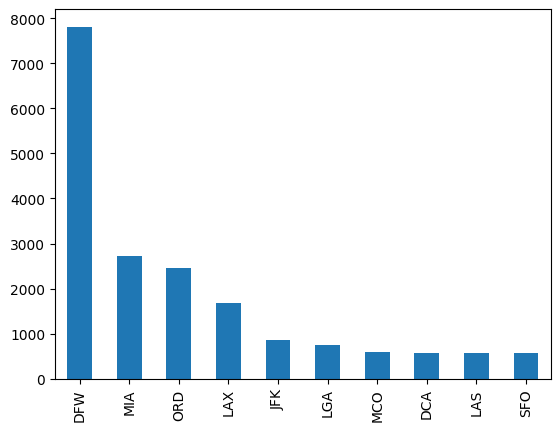

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].value_counts()[:10].plot(kind='bar')
plt.show()


Еще один способ как найти перевозчика с наибольшим числом рейсов. Методом groupby

In [ ]:
df.groupby('AIRLINE').size().sort_values()[::-1]

AIRLINE
WN    62797
DL    40629
EV    31134
OO    29805
AA    27803
UA    24450
US    21088
MQ    17326
B6    13794
AS     8447
NK     5501
F9     4373
HA     4089
VX     3037
dtype: int64

Найдем, сколько времени самолеты каждой авиакомпании проводят в воздухе. Обратите внимание, что сначала строковые значения нужно привести в числовой тип:

In [ ]:
df.AIR_TIME = df.AIR_TIME.astype(float)
df.groupby('AIRLINE')['AIR_TIME'].sum()

AIRLINE
AA    4043321.0
AS    1336634.0
B6    2012328.0
DL    4826359.0
EV    2323743.0
F9     562473.0
HA     345049.0
MQ    1205377.0
NK     740858.0
OO    2228151.0
UA    4102101.0
US    2636208.0
VX     568739.0
WN    6453420.0
Name: AIR_TIME, dtype: float64

Найдем авиакомпанию, у которой больше всего география вылетов (как еще можно решить эту задачу?)

In [ ]:
df.groupby('AIRLINE')['ORIGIN_AIRPORT'].nunique().sort_values()[::-1]

AIRLINE
OO    175
EV    166
DL    145
MQ    122
WN     86
AA     81
UA     76
US     74
F9     63
AS     59
B6     57
NK     33
VX     18
HA     17
Name: ORIGIN_AIRPORT, dtype: int64

У какой авиакомпании больше всего маршрутов?

In [ ]:
df['ROUTE'] = df['ORIGIN_AIRPORT'] + df['DESTINATION_AIRPORT']
df.groupby('AIRLINE')['ROUTE'].nunique().sort_values()[::-1]

AIRLINE
WN    1142
EV    1072
OO     964
DL     699
UA     486
AA     353
MQ     342
US     310
B6     290
F9     260
AS     229
NK     212
VX      62
HA      48
Name: ROUTE, dtype: int64

Пора заменить кодовые названия авиакомпаний и аэропортов на полные названия. Для этого нужно соединять таблицы из датасета. Есть как минимум 4 способа это сделать:

![](https://www.tektutorialshub.com/wp-content/uploads/2019/12/Differences-in-inner-and-left-right-and-full-outer-joins.png)

Таблица перевозчиков

In [ ]:
df_air = pd.read_csv('/content/sample_data/flights.csv')
df_air.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Подготовим левую таблицу

In [ ]:
tmp = df.groupby('AIRLINE')['ROUTE'].nunique().sort_values()[::-1].to_frame().reset_index()
tmp.head()

,AIRLINE,ROUTE
0,WN,1142
1,EV,1072
2,OO,964
3,DL,699
4,UA,486


Сделаем одно необязательное действие по переименованию колонок

In [ ]:
tmp = tmp.rename(columns={'AIRLINE': 'IATA_CODE'})
tmp.head()

,IATA_CODE,ROUTE
0,WN,1142
1,EV,1072
2,OO,964
3,DL,699
4,UA,486


Соединим две таблицы по ключу IATA_CODE

In [ ]:
#tmp.merge(df_air, on='IATA_CODE')


Теперь поработаем с аэропортами и изобразим на георгрфической карты все маршруты одной из компаний

Считаем таблицу аэропортов

In [ ]:
df_arp = pd.read_csv('/content/sample_data/flights.csv')
df_arp.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Нам потребуется библиотека basemap. Скорее всего, ее придется установить с помощью команды pip install basemap в терминале или в ячейке ноутбука

In [ ]:
# !pip install basemap

Отрисуем карту

In [ ]:
#from mpl_toolkits.basemap import Basemap

#fig = plt.figure(figsize=(15, 10))
#land = Basemap(projection='lcc', resolution=None,
               #width=15E6, height=8E6,
               #lat_0=45, lon_0=-100,)
#land.etopo(scale=0.5, alpha=0.9)
#plt.show()

Теперь выберем одного перевозчика и все его маршруты:

In [ ]:
routes = df.loc[df.AIRLINE == 'AA', ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].drop_duplicates()
routes

,ORIGIN_AIRPORT,DESTINATION_AIRPORT
1,LAX,PBI
3,LAX,MIA
8,SFO,DFW
11,LAS,MIA
21,SEA,MIA
...,...,...
37558,DFW,MTJ
39412,MTJ,DFW
44680,MIA,TUL
81957,JFK,CLT


Нам нужно создать два массива с координатами городом вылета и приземления

In [ ]:
#orig = routes[['ORIGIN_AIRPORT']].merge(df_arp,
                                        #left_on='ORIGIN_AIRPORT',
                                        #right_on='IATA_CODE',
                                        #how='left')
#dest = routes[['DESTINATION_AIRPORT']].merge(df_arp,
                                             #left_on='DESTINATION_AIRPORT',
                                             #right_on='IATA_CODE',
                                             #how='left')
#orig

Чтобы нанести точку с заданной широтой/долготой на карту, георгафические координаты нужно перевести в x, y. Технически, это делается так:
```python
x, y = land(long, lat)```

Практически, это можно реализовать несколькоми способами. Ниже показано два варианта:

In [ ]:
#orig_xy = orig[['LONGITUDE', 'LATITUDE']].apply(lambda x: land(*x), axis=1).values
#orig_xy = np.stack(orig_xy) #делаем из списка пар координат двумерный массив:
#orig_xy

А можно было сделать так

In [ ]:
dest_xy = np.array(land(dest['LONGITUDE'], dest['LATITUDE'])).T
dest_xy

Отрисуем линии на карте:

In [ ]:
fig = plt.figure(figsize=(15, 10))
m = Basemap(projection='lcc', resolution=None,
            width=15E6, height=8E6,
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.9)

for a, b in zip(orig_xy, dest_xy):
    plt.plot([a[0], b[0]], [a[1], b[1]], c='k', lw=1)
plt.show()

Домашнее задание - подготовить отчет для министерства транспорта, раскрывающий характер и особенности задержек авиарейсов. Отчет должен помочь увидеть проблемные точки и способствовать принятию решений. Поэтому стремитесь не констатировать общие факты, а показывать проблемы. Например, сам по себе факт "средняя задержка вылета составляет 15 минут" мало о чем говорит и не помогает понять, из-за чего так происходит. Напротив, график, показывающий, что по понедельникам опоздания возрастают в три раза по сравнению с остальными днями на фоне возрастания числа рейсов и пассажиров, подсказывает возможную причину проблемы: аэропорты не справляются с неравномерной нагрузкой.

Отчет должен быть оформлен в виде ноутбука с четкой структурой. Вначале в ячейке Markdown идет краткое описание исследуемого вопроса (что будем изучать), затем код и все его выводы (таблицы, графики, величины), после этого снова в ячейке Markdown в которой сформулирован ваш краткий вывод.

В отчете должно быть не менее 5 результатов, подтвержденных графиками. Для разнообразия материала используйте различные типы диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, легенда цветовая схема).

Для решения задач используйте методы библиотеки pandas.

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

airports = pd.read_csv('/content/sample_data/airports.csv')
airlines = pd.read_csv('/content/sample_data/airlines.csv')
flights  = pd.read_csv('/content/sample_data/flights.csv', dtype=str)
df = pd.read_csv('/content/sample_data/flights.csv')


1. Сначала рассмотрим самое простое: соотношение задержки вылета и задержки прибытия

In [226]:
len(df), df.shape

(300145, (300145, 31))

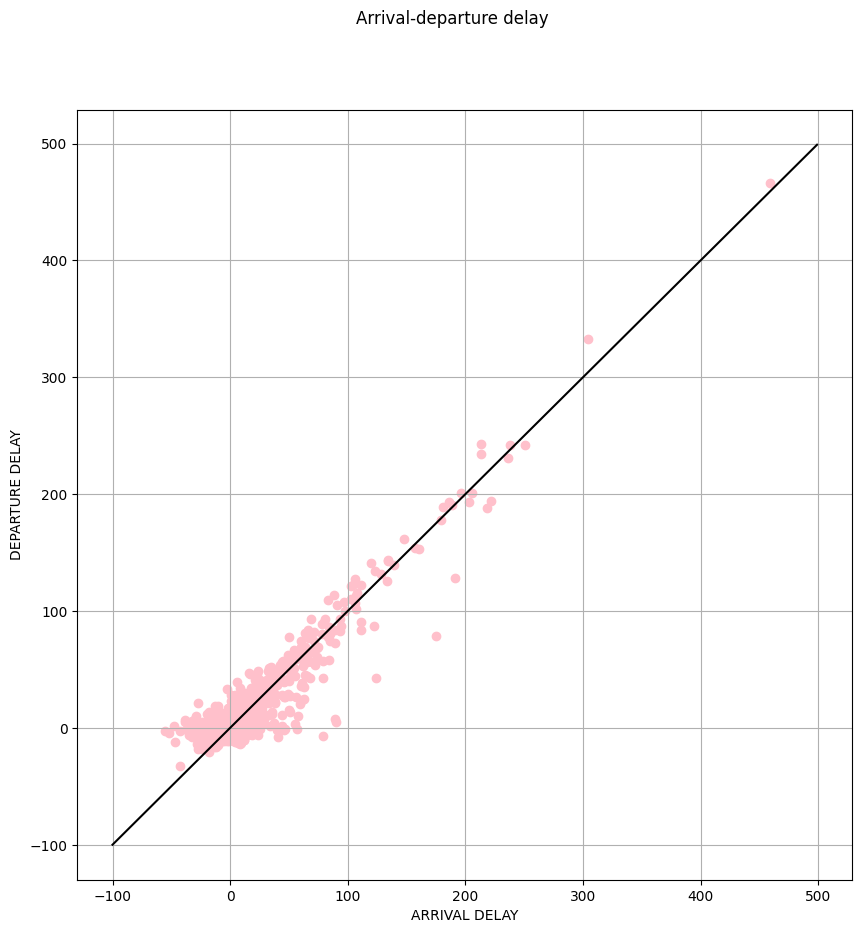

In [228]:

import math
flights.DEPARTURE_DELAY = pd.to_numeric(flights["DEPARTURE_DELAY"])
flights.ARRIVAL_DELAY = pd.to_numeric(flights["ARRIVAL_DELAY"])
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
fig.suptitle('Arrival-departure delay')
Arrival = flights['ARRIVAL_DELAY'][1:5000000:250]
Departure = flights['DEPARTURE_DELAY'][1:5000000:250]
plt.scatter(Arrival, Departure, color='pink')
x = np.arange(-100, 500 )
plt.plot(x, x, c='black')
plt.xlabel('ARRIVAL DELAY')
plt.ylabel('DEPARTURE DELAY')
plt.grid()
plt.show()



!!Из графика видно(если точки на оси x=y, время задержки выдета соостветствует времени задержки прибытия), что задержки отправления зачастую больше задержек прибытия. Следовательно, стоит брать во внимание отделльно прибыите и отправление

Посмотрим, какая взаимосвязь между задержками и днями недели:

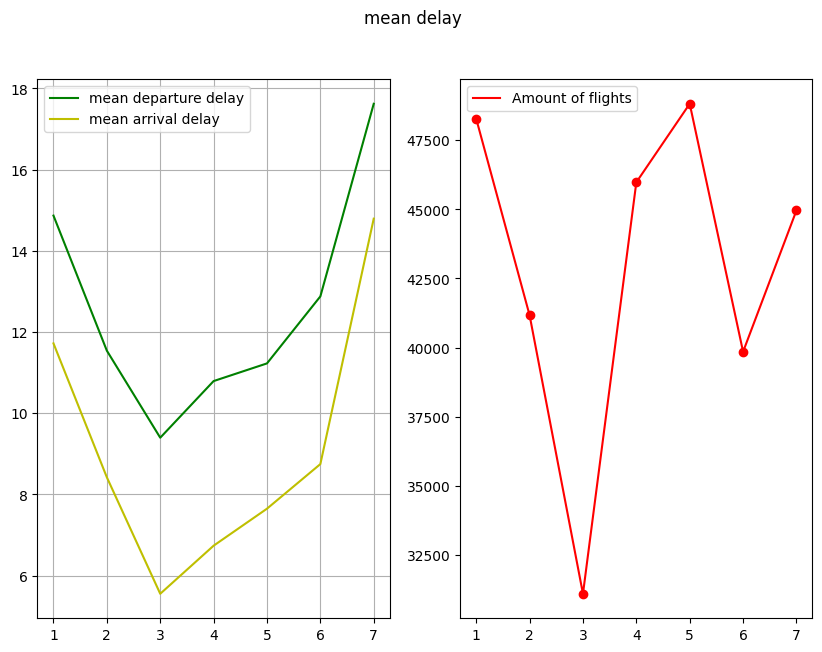

Corr =  0.4591307037041364


In [229]:
fig, axs = plt.subplots(1, 2, figsize = (10, 7))
fig.suptitle('mean delay')
axs[0].plot(range(1, len(flights.groupby("DAY_OF_WEEK"))+1), flights.groupby("DAY_OF_WEEK")['DEPARTURE_DELAY'].mean(), color = 'g', label = "mean departure delay")
axs[0].plot(range(1, len(flights.groupby("DAY_OF_WEEK"))+1), flights.groupby("DAY_OF_WEEK")['ARRIVAL_DELAY'].mean(), color = 'y', label = "mean arrival delay")
axs[0].grid()
axs[0].legend()

axs[1].plot(range(1, len(flights.groupby("DAY_OF_WEEK"))+1), flights.groupby("DAY_OF_WEEK").size(), label = "Amount of flights", color = "red")
axs[1].scatter(range(1, len(flights.groupby("DAY_OF_WEEK"))+1), flights.groupby("DAY_OF_WEEK").size(), color = "red")
axs[1].legend()
plt.show()

print("Corr = ", np.corrcoef(flights.groupby("DAY_OF_WEEK")['DEPARTURE_DELAY'].mean(), flights.groupby("DAY_OF_WEEK").size())[0, 1])



Значение корреляции "слабая"-"средняя" или "умеренная", но при уменьшении нагрузки работники спрляются с минимальными задержками. Поэтому стоит  увеличить для начала число работников-договорников на непродолжительный период, чтобы оценить, начнет ли падать время задержек в самые загруженные дни(понедельник и пятницу).
Пилоты добросовестно выполняют свою раоту и пытаются уменьшить время фактического перелета, чтобы задержка прибытия была как можно меньше

Рассмотрим зависимость сезона года и задержек

In [216]:
pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2015-01-01
4        2015-01-01
            ...    
300140   2015-01-20
300141   2015-01-20
300142   2015-01-20
300143   2015-01-20
300144   2015-01-20
Length: 300145, dtype: datetime64[ns]

данные не предоставлены для различных месяцев
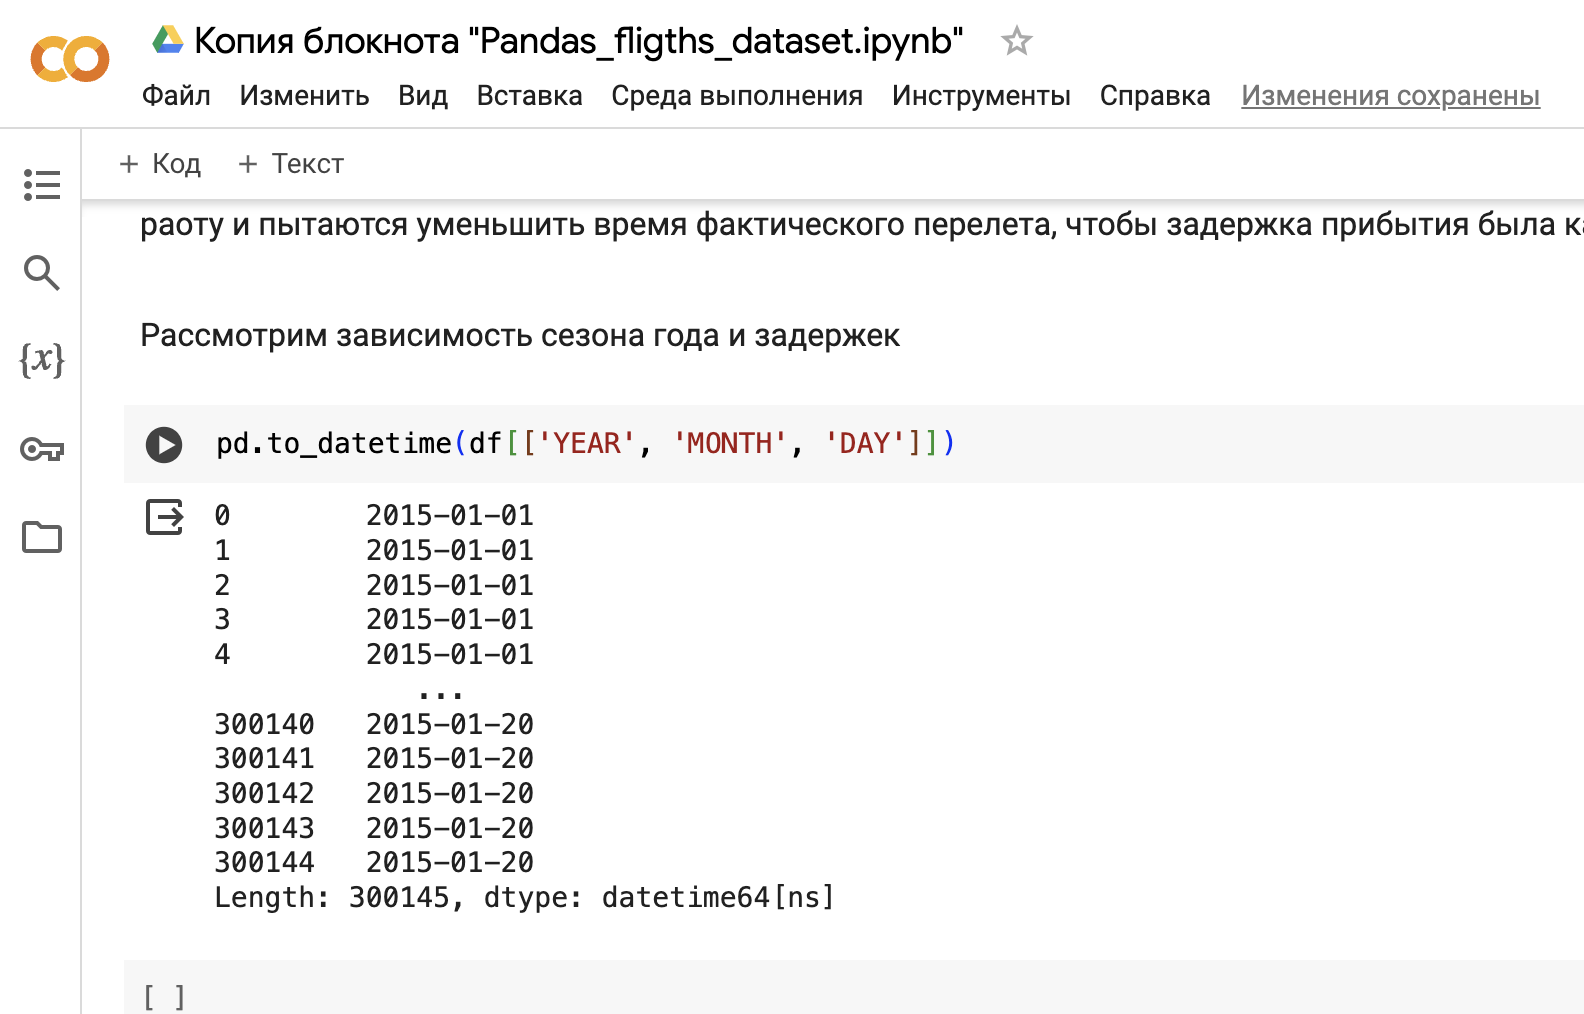

2. Задержка в зависимости от авиакомпании

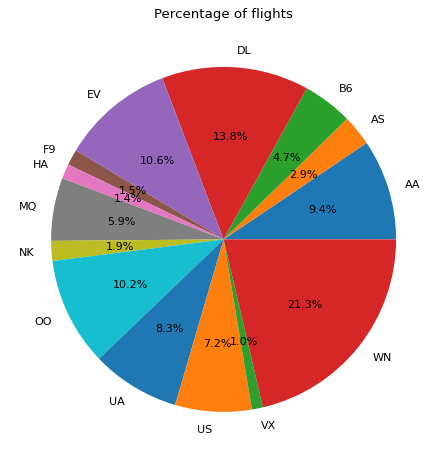

In [ ]:
fig = plt.figure(figsize = (13,7), dpi=80)
fig.patch.set_facecolor('xkcd:white')
airlinesdata = df.groupby('AIRLINE')

meanA = airlinesdata['DEPARTURE_DELAY'].mean().to_frame(name = 'mean')
minA = airlinesdata['DEPARTURE_DELAY'].min().to_frame(name='min')
maxA = airlinesdata['DEPARTURE_DELAY'].max().to_frame(name='max')
countA = airlinesdata['DEPARTURE_DELAY'].count().to_frame(name='amount')

mainStatsAboutAirlines = pd.concat([meanA, minA, maxA, countA], axis=1)
num = mainStatsAboutAirlines['amount']/sum(mainStatsAboutAirlines['amount'])
plt.pie(100 * num, labels=mainStatsAboutAirlines.index, autopct='%1.1f%%')

plt.title("Percentage of flights")
plt.show()


Corr =  0.034951039518165306
              mean   min     max  amount
AIRLINE                                 
AA       14.115321 -29.0  1604.0   27818
AS        3.589947 -47.0   444.0    8455
B6       12.135313 -27.0   500.0   13805
DL        8.035459 -26.0  1184.0   40638
EV       13.212914 -33.0   726.0   31191
F9       22.853358 -24.0   588.0    4378
HA        2.272794 -20.0   830.0    4091
MQ       21.270948 -29.0   780.0   17376
NK       17.704867 -23.0   557.0    5506
OO       15.696442 -42.0   931.0   29935
UA       17.883670 -40.0   886.0   24482
US        6.381557 -25.0   638.0   21103
VX        8.860059 -18.0   397.0    3037
WN       12.564971 -14.0   604.0   62890


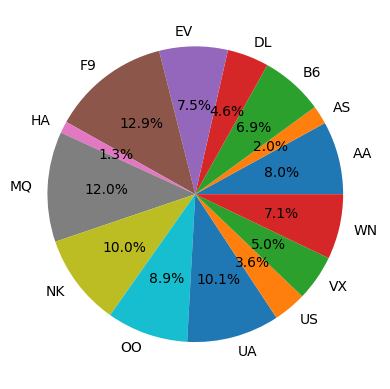

In [ ]:
meanper = mainStatsAboutAirlines['mean']/sum(mainStatsAboutAirlines['mean'])
print("Corr = ", np.corrcoef(meanper, num)[1, 0])
print(mainStatsAboutAirlines)

plt.pie(100 * meanper, labels = mainStatsAboutAirlines.index, autopct='%1.1f%%')
plt.show()

Взаимосвязь между количеством перелетов в каждой компании отельно и средним количеством задржек не обнаружена(корреляция почти 0, что означает отсутствие связи между переменными)

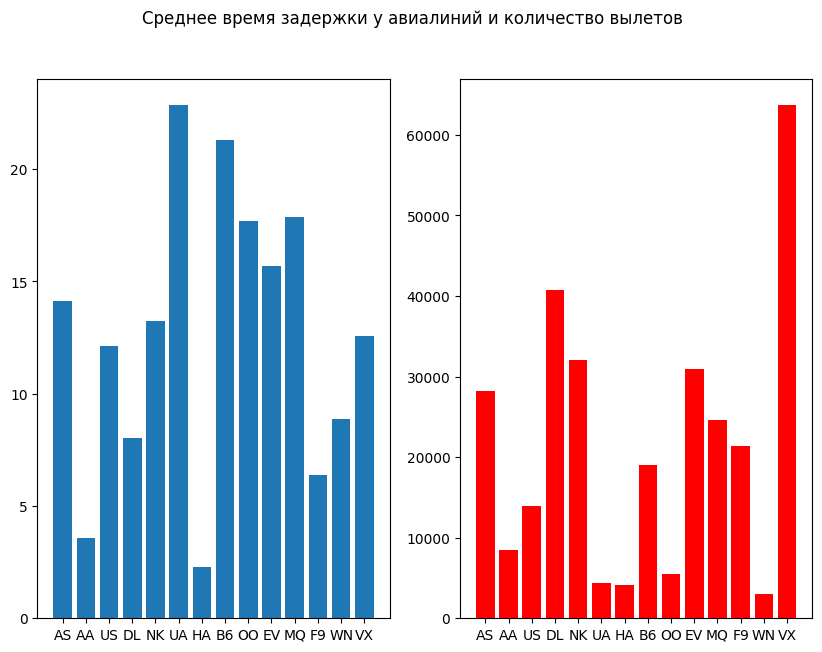

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
fig.suptitle('Среднее время задержки у авиалиний и количество вылетов')
ax[0].bar(flights.AIRLINE.unique(), flights.groupby("AIRLINE")['DEPARTURE_DELAY'].mean())
ax[1].bar(flights.AIRLINE.unique(), flights.groupby("AIRLINE").size(), color = 'r')
plt.show()



Можно лишь видеть, что отдельные компании большего успеха в регулировке опозданий. Необходимо изучение методов работы в днных компаниях или программа по обмену опытом среди авиакомпаний(если в данной сфере такая имеется)

оттолкнемся теперь от авиакомпаний

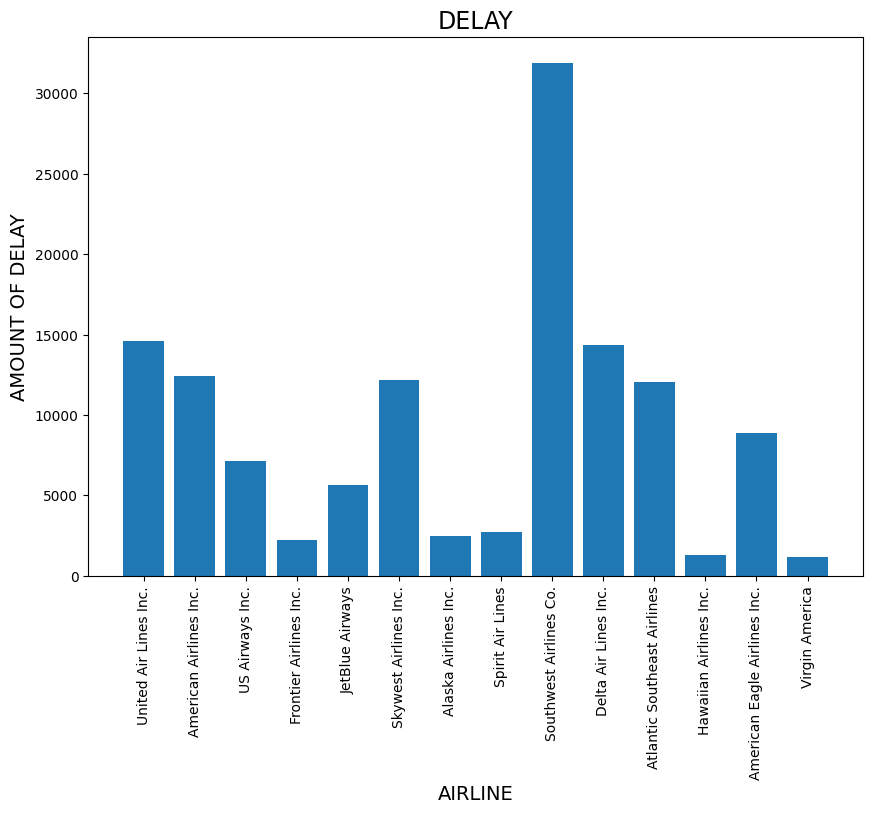

In [265]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('xkcd:white')

Y = dict(df.loc[df.DEPARTURE_DELAY > 0, 'AIRLINE'].value_counts())
Z = [Y[airlines['IATA_CODE'][i]] for i in range(14)]
X = list(airlines.AIRLINE)
plt.bar(X, Z)
plt.xlabel("AIRLINE", fontsize = 14)
plt.ylabel("AMOUNT OF DELAY", fontsize = 14)
plt.xticks(X, fontsize=10, rotation=90)
plt.title('DELAY', fontsize=17)
plt.show()


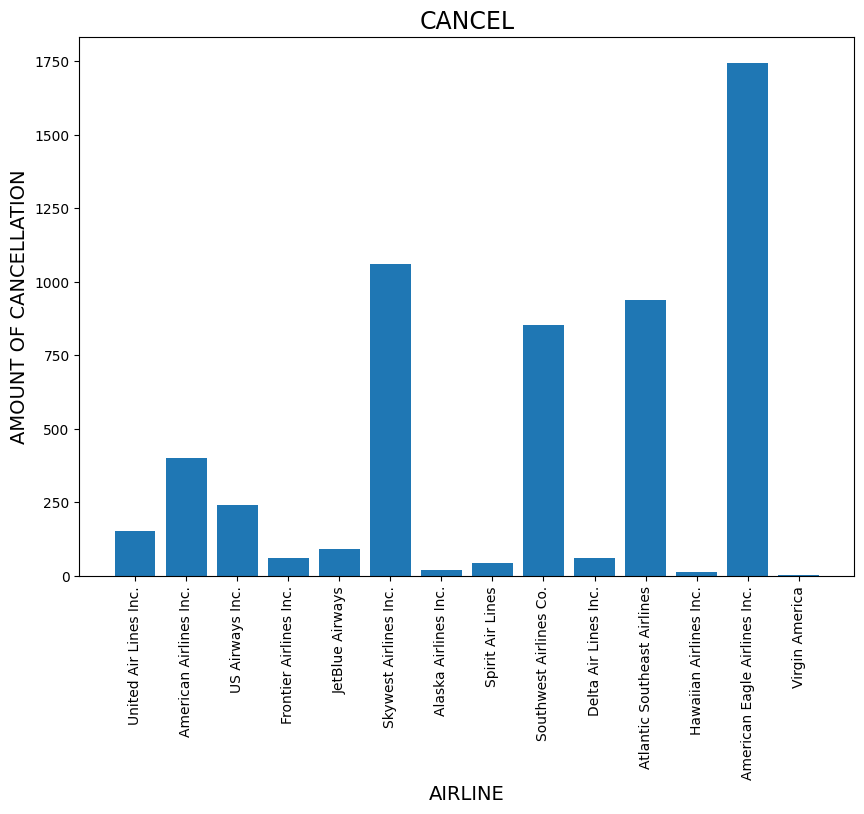

In [268]:
fig = plt.figure(figsize=(10, 7))
fig.patch.set_facecolor('xkcd:white')

Y = dict(df.loc[df.CANCELLED == 1, 'AIRLINE'].value_counts())
Z = [Y[airlines['IATA_CODE'][i]] for i in range(14)]
X = list(airlines.AIRLINE)
plt.bar(X, Z)
plt.xlabel("AIRLINE", fontsize = 14)
plt.ylabel("AMOUNT OF CANCELLATION", fontsize = 14)
plt.xticks(X, fontsize=10, rotation=90)
plt.title('CANCEL', fontsize=17)
plt.show()


skywest и southwest имеют больше всего проблем с отправкой и своевременной отправкой. Лучше выбирать другие airlines(например HAWAIIAN, Alaska, SPIRIT, VIRGIN AMERICA)